In [60]:
import numpy as np
import seaborn as sns 
import pandas as pd
from tqdm import tqdm
import cv2
from tensorflow.keras.applications import Xception
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

In [61]:
TRAIN_PATH = '../Steel Defect Detection Dataset'
TRAIN_IMAGES = '../Steel Defect Detection Dataset/train_images'
TEST_IMAGES = '../Steel Defect Detection Dataset/train_images'

In [62]:
df_train = pd.read_csv(TRAIN_PATH + '/train.csv')
df_submission = pd.read_csv(TRAIN_PATH + '/sample_submission.csv')

In [63]:
df_train.head()

,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...


In [64]:
df_train.shape

(7095, 3)

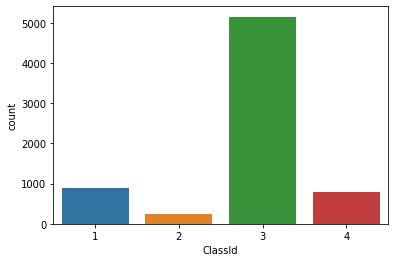

In [65]:
sns.countplot(x= df_train['ClassId'])
plt.show()

In [66]:
img = cv2.imread(TRAIN_IMAGES + '/0002cc93b.jpg')

In [67]:
img

array([[[ 70,  70,  70],
        [ 70,  70,  70],
        [ 68,  68,  68],
        ...,
        [ 48,  48,  48],
        [ 48,  48,  48],
        [ 50,  50,  50]],

       [[ 66,  66,  66],
        [ 68,  68,  68],
        [ 68,  68,  68],
        ...,
        [ 48,  48,  48],
        [ 49,  49,  49],
        [ 51,  51,  51]],

       [[ 61,  61,  61],
        [ 64,  64,  64],
        [ 65,  65,  65],
        ...,
        [ 49,  49,  49],
        [ 51,  51,  51],
        [ 54,  54,  54]],

       ...,

       [[155, 155, 155],
        [133, 133, 133],
        [131, 131, 131],
        ...,
        [ 51,  51,  51],
        [ 51,  51,  51],
        [ 50,  50,  50]],

       [[160, 160, 160],
        [111, 111, 111],
        [100, 100, 100],
        ...,
        [ 55,  55,  55],
        [ 54,  54,  54],
        [ 48,  48,  48]],

       [[155, 155, 155],
        [114, 114, 114],
        [ 98,  98,  98],
        ...,
        [ 58,  58,  58],
        [ 58,  58,  58],
        [ 50,  50,  50]]

In [68]:
df_train.head()

,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...


In [69]:
len(df_train)

7095

In [70]:
from imutils import paths

In [71]:
for random_image in paths.list_images(TRAIN_IMAGES + '{0002cc93b.jpg}'):
    print(random_image)
    plt.imshow(random_image)
    plt.show()

The class ID for this image is: 1


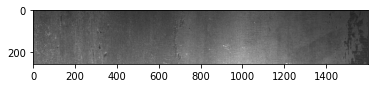

The class ID for this image is: 3


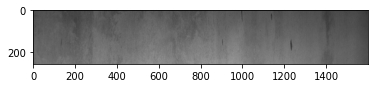

The class ID for this image is: 1


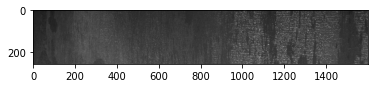

The class ID for this image is: 4


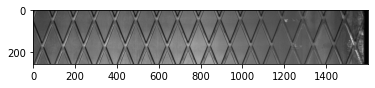

The class ID for this image is: 3


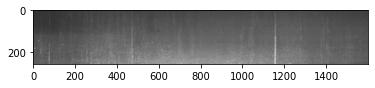

The class ID for this image is: 3


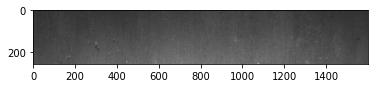

The class ID for this image is: 4


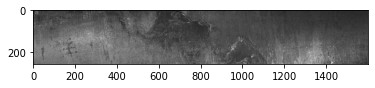

The class ID for this image is: 4


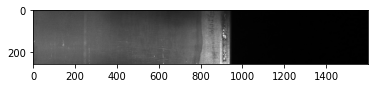

The class ID for this image is: 1


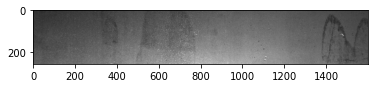

In [72]:
count = 0 
for image_path in paths.list_images(TRAIN_IMAGES):
    print("The class ID for this image is: {}".format(df_train['ClassId'].iloc[count]))
    count = count + 1
    random_image = plt.imread(image_path)
    plt.imshow(random_image)
    plt.show()
    if count == 9:
        break
        

In [73]:
images = []
classID = []
for image_id, class_id, encoded_bits in tqdm(df_train.values):
    img = cv2.imread(TRAIN_IMAGES + '/{}'.format(image_id), cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))
    img = img / 255
    images.append(img)
    classID.append(class_id)

100%|█████████████████████████████████████████████████████████████████████████████| 7095/7095 [00:54<00:00, 129.89it/s]


In [74]:
from sklearn.preprocessing import LabelBinarizer

In [75]:
images = np.array(images, dtype = np.float32)
classID = np.array(classID, dtype = np.float32)

In [76]:
lb = LabelBinarizer()
classID = lb.fit_transform(classID)

In [77]:
images[0]

array([[[0.25882354, 0.25882354, 0.25882354],
        [0.46666667, 0.46666667, 0.46666667],
        [0.23137255, 0.23137255, 0.23137255],
        ...,
        [0.18431373, 0.18431373, 0.18431373],
        [0.21568628, 0.21568628, 0.21568628],
        [0.2       , 0.2       , 0.2       ]],

       [[0.25882354, 0.25882354, 0.25882354],
        [0.30588236, 0.30588236, 0.30588236],
        [0.24705882, 0.24705882, 0.24705882],
        ...,
        [0.20392157, 0.20392157, 0.20392157],
        [0.22352941, 0.22352941, 0.22352941],
        [0.19215687, 0.19215687, 0.19215687]],

       [[0.24705882, 0.24705882, 0.24705882],
        [0.24313726, 0.24313726, 0.24313726],
        [0.23529412, 0.23529412, 0.23529412],
        ...,
        [0.20392157, 0.20392157, 0.20392157],
        [0.21960784, 0.21960784, 0.21960784],
        [0.19215687, 0.19215687, 0.19215687]],

       ...,

       [[0.49411765, 0.49411765, 0.49411765],
        [0.5019608 , 0.5019608 , 0.5019608 ],
        [0.44313726, 0

In [78]:
classID[0]

array([1, 0, 0, 0])

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X_train, X_cv, y_train, y_cv = train_test_split(images, classID, test_size = 0.2, 
                                                stratify = classID, random_state = 101)

In [81]:
len(X_train)

5676

In [82]:
len(X_cv)

1419

In [83]:
type(X_train)

numpy.ndarray

In [84]:
lb.classes_

array([1., 2., 3., 4.], dtype=float32)

In [85]:
from tensorflow.keras.applications import Xception, VGG19, ResNet152, InceptionV3, EfficientNetB0
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input 
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras import Model 
from tensorflow.keras.optimizers import Adam

In [27]:
headmodel = VGG19(weights = "imagenet", include_top = False,
             input_tensor = Input(shape = (224, 224, 3)))
model = headmodel.output
model = AveragePooling2D(pool_size= (5, 5))(model)
model = Flatten(name = 'flatten')(model)
model = Dense(512, activation = 'relu')(model)
model = Dropout(0.2)(model)
model = Dense(len(lb.classes_), activation = 'softmax')(model)

final_model = Model(inputs = headmodel.input, outputs = model)

for layer in headmodel.layers[: -5]:
    layer.trainable = False

In [28]:
opt = Adam(lr = 1e-3)
final_model.compile(loss = "categorical_crossentropy", optimizer = opt,
                   metrics = ["accuracy"])

In [29]:
final_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [86]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [87]:
MODEL_SAVE_PATH = "Models/"

In [32]:
checkpoint = ModelCheckpoint(MODEL_SAVE_PATH + "VGG19_weights.h5", monitor = 'val_loss', verbose = 0, 
                            save_best_only = True, save_weights_only = False,
                            mode = 'auto', save_freq = 'epoch')

In [33]:
fitted_model = final_model.fit(X_train, y_train, epochs = 10, validation_data = (X_cv, y_cv),
                               callbacks = checkpoint, batch_size = 64)

Epoch 1/10
89/89 [==============================] - 22s 242ms/step - loss: 0.7848 - accuracy: 0.7185 - val_loss: 0.6351 - val_accuracy: 0.75330.7989 
Epoch 2/10
89/89 [==============================] - 20s 225ms/step - loss: 0.5337 - accuracy: 0.7720 - val_loss: 0.4771 - val_accuracy: 0.8125- loss: 0.5600 - accuracy - ETA: 5s - loss: 0.5516 - accuracy: 0. - ETA: 5s - - ETA: 2s - loss:
Epoch 3/10
89/89 [==============================] - 20s 227ms/step - loss: 0.4553 - accuracy: 0.8053 - val_loss: 0.4626 - val_accuracy: 0.8055 accura - ETA: 1s - loss: 0.4555 - accuracy: 0.80 - ETA: 1s - loss: 0.4555 - accuracy: 0.80 - ETA: 1s - loss: 0.4554 - ac
Epoch 4/10
89/89 [==============================] - 20s 229ms/step - loss: 0.4049 - accuracy: 0.8266 - val_loss: 0.4681 - val_accuracy: 0.8013: 0.4111 - ETA: 8s - loss: 0.4040 - accuracy: 
Epoch 5/10
89/89 [==============================] - 20s 230ms/step - loss: 0.3745 - accuracy: 0.8372 - val_loss: 0.4486 - val_accuracy: 0.8302
Epoch 6/10
89/89

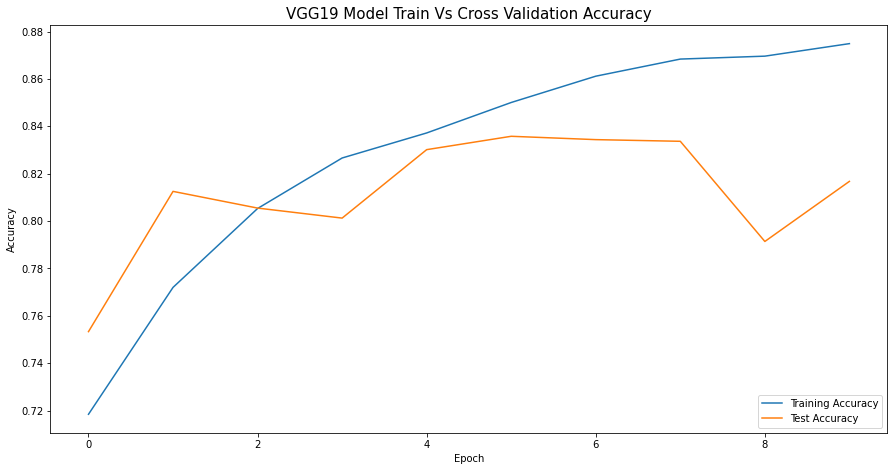

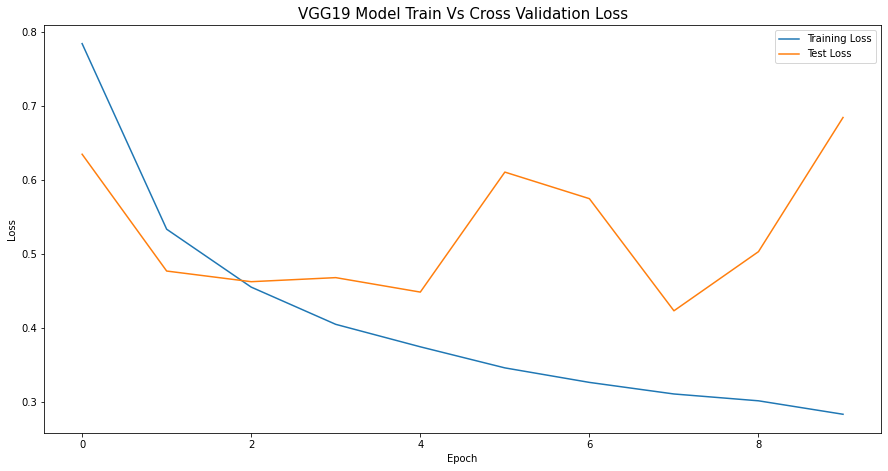

In [34]:
N = 10
plt.figure(figsize = (15, 7.5))
plt.plot(np.arange(0, N), fitted_model.history['accuracy'], label = "Training Accuracy")
plt.plot(np.arange(0, N), fitted_model.history['val_accuracy'], label = "Test Accuracy")
plt.title('VGG19 Model Train Vs Cross Validation Accuracy', fontsize = 15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc = 'lower right')
plt.savefig("Plots/VGG19_Accuracy_plot.jpg")
plt.show()

plt.figure(figsize = (15, 7.5))
plt.plot(np.arange(0, N), fitted_model.history['loss'], label = "Training Loss")
plt.plot(np.arange(0, N), fitted_model.history['val_loss'], label = "Test Loss")
plt.title('VGG19 Model Train Vs Cross Validation Loss', fontsize = 15)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc = 'upper right')
plt.savefig("Plots/VGG19_Loss_plot.jpg")
plt.show()


In [40]:
## AveragePooling2D layer size (4, 4) and dropout rate 0.1 
headmodel = VGG19(weights = "imagenet", include_top = False,
             input_tensor = Input(shape = (224, 224, 3)))
model = headmodel.output
model = AveragePooling2D(pool_size= (4, 4))(model)
model = Flatten(name = 'flatten')(model)
model = Dense(512, activation = 'relu')(model)
model = Dropout(0.1)(model)
model = Dense(len(lb.classes_), activation = 'softmax')(model)

final_model = Model(inputs = headmodel.input, outputs = model)

for layer in headmodel.layers[: -6]:
    layer.trainable = False

In [41]:
opt = Adam(lr = 1e-3)
final_model.compile(loss = "categorical_crossentropy", optimizer = opt,
                   metrics = ["accuracy"])

In [42]:
final_model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [43]:
checkpoint = ModelCheckpoint(MODEL_SAVE_PATH + "VGG19_weights_modified.h5", monitor = 'val_loss', verbose = 0, 
                            save_best_only = True, save_weights_only = False,
                            mode = 'auto', save_freq = 'epoch')

In [44]:
final_model.fit(X_train, y_train, epochs = 10, validation_data = (X_cv, y_cv), 
                callbacks = checkpoint, batch_size = 64)

Epoch 1/10
89/89 [==============================] - 21s 234ms/step - loss: 0.8078 - accuracy: 0.7289 - val_loss: 0.7036 - val_accuracy: 0.73933s - loss: 1.0651 - accuracy:  - ETA: 13s - loss: 0.9931 - accurac - ETA: 11s - lo
Epoch 2/10
89/89 [==============================] - 21s 232ms/step - loss: 0.6016 - accuracy: 0.7607 - val_loss: 0.5572 - val_accuracy: 0.7667 - loss: 0.6982 - accura - ETA: 12s - loss: 0.6507 - accuracy: 0.747 - ETA: 12s - loss: 0.6504 - ETA: 9s - loss: 0.6164 - ac
Epoch 3/10
89/89 [==============================] - 21s 240ms/step - loss: 0.5130 - accuracy: 0.7940 - val_loss: 0.4972 - val_accuracy: 0.7942
Epoch 4/10
89/89 [==============================] - 22s 245ms/step - loss: 0.4456 - accuracy: 0.8088 - val_loss: 0.4753 - val_accuracy: 0.8161
Epoch 5/10
89/89 [==============================] - 22s 246ms/step - loss: 0.4083 - accuracy: 0.8272 - val_loss: 0.4694 - val_accuracy: 0.8238
Epoch 6/10
89/89 [==============================] - 22s 253ms/step - loss: 0.37

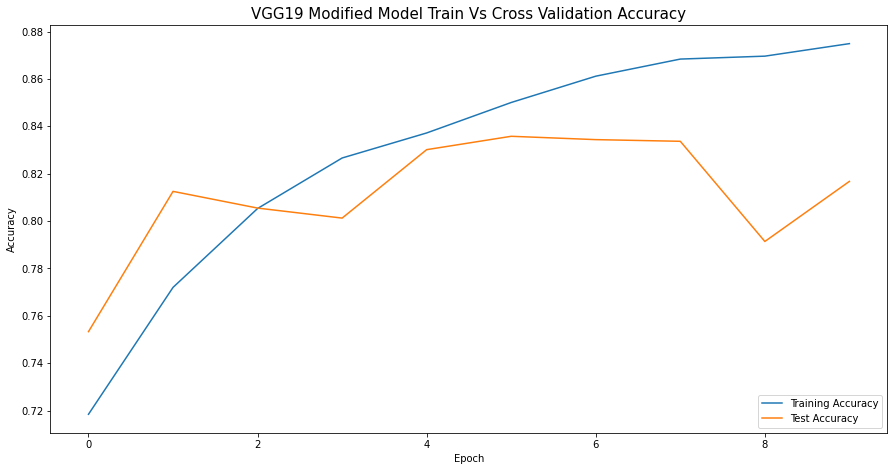

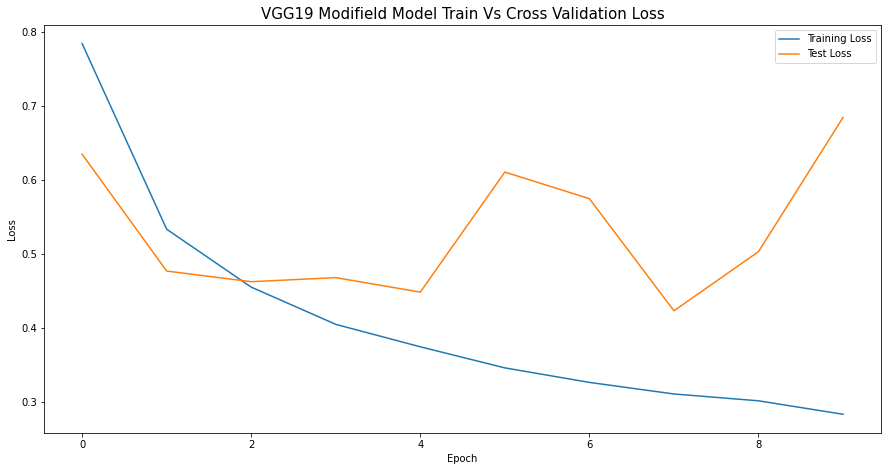

In [45]:
N = 10
plt.figure(figsize = (15, 7.5))
plt.plot(np.arange(0, N), fitted_model.history['accuracy'], label = "Training Accuracy")
plt.plot(np.arange(0, N), fitted_model.history['val_accuracy'], label = "Test Accuracy")
plt.title('VGG19 Modified Model Train Vs Cross Validation Accuracy', fontsize = 15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc = 'lower right')
plt.savefig("Plots/VGG19_modified_Accuracy_plot.jpg")
plt.show()

plt.figure(figsize = (15, 7.5))
plt.plot(np.arange(0, N), fitted_model.history['loss'], label = "Training Loss")
plt.plot(np.arange(0, N), fitted_model.history['val_loss'], label = "Test Loss")
plt.title('VGG19 Modifield Model Train Vs Cross Validation Loss', fontsize = 15)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc = 'upper right')
plt.savefig("Plots/VGG19_modified_Loss_plot.jpg")
plt.show()


In [88]:
headmodel = EfficientNetB0(weights = "imagenet", include_top = False,
             input_tensor = Input(shape = (299, 299, 3)))
model = headmodel.output
model = AveragePooling2D(pool_size= (5, 5))(model)
model = Flatten(name = 'flatten')(model)
model = Dense(512, activation = 'relu')(model)
model = Dropout(0.2)(model)
model = Dense(len(lb.classes_), activation = 'softmax')(model)

final_model = Model(inputs = headmodel.input, outputs = model)

for layer in headmodel.layers:
    layer.trainable = False

16711680/16705208 [==============================] - 0s 0us/step


In [89]:
opt = Adam(lr = 1e-3)
final_model.compile(loss = "categorical_crossentropy", optimizer = opt,
                   metrics = ["accuracy"])

In [90]:
final_model.summary()

Model: "functional_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 299, 299, 3)  0           input_6[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 299, 299, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 301, 301, 3)  0           normalization[0][0]              
______________________________________________________________________________________

In [91]:
checkpoint = ModelCheckpoint(MODEL_SAVE_PATH + "EfficientNetB0_weights.h5", monitor = 'val_loss', verbose = 0, 
                            save_best_only = True, save_weights_only = False,
                            mode = 'auto', save_freq = 'epoch')

In [92]:
fitted_model = final_model.fit(X_train, y_train, validation_data = (X_cv, y_cv), 
               callbacks = checkpoint, epochs = 10, batch_size = 64)

Epoch 1/10


ValueError: in user code:

    C:\Users\suhas maddali\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Users\suhas maddali\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\suhas maddali\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\suhas maddali\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\suhas maddali\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\suhas maddali\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\Users\suhas maddali\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:747 train_step
        y_pred = self(x, training=True)
    C:\Users\suhas maddali\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\base_layer.py:985 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\suhas maddali\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\functional.py:385 call
        return self._run_internal_graph(
    C:\Users\suhas maddali\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\functional.py:508 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    C:\Users\suhas maddali\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\Users\suhas maddali\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\input_spec.py:212 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer dense_10 is incompatible with the layer: expected axis -1 of input shape to have value 5120 but received input with shape [None, 1280]


In [ ]:
N = 10
plt.figure(figsize = (15, 7.5))
plt.plot(np.arange(0, N), fitted_model.history['accuracy'], label = "Training Accuracy")
plt.plot(np.arange(0, N), fitted_model.history['val_accuracy'], label = "Test Accuracy")
plt.title('EfficientNetB0 Model Train Vs Cross Validation Accuracy', fontsize = 15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc = 'lower right')
plt.savefig("Plots/EfficientNetB0_Accuracy_plot.jpg")
plt.show()

plt.figure(figsize = (15, 7.5))
plt.plot(np.arange(0, N), fitted_model.history['loss'], label = "Training Loss")
plt.plot(np.arange(0, N), fitted_model.history['val_loss'], label = "Test Loss")
plt.title('EfficientNetB0 Model Train Vs Cross Validation Loss', fontsize = 15)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc = 'upper right')
plt.savefig("Plots/EfficientNetB0_Loss_plot.jpg")
plt.show()


In [46]:
images = []
classID = []
for image_id, class_id, encoded_bits in tqdm(df_train.values):
    img = cv2.imread(TRAIN_IMAGES + '/{}'.format(image_id), cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (299, 299))
    img = img / 255
    images.append(img)
    classID.append(class_id)

100%|█████████████████████████████████████████████████████████████████████████████| 7095/7095 [00:55<00:00, 128.26it/s]


In [47]:
images = np.array(images, dtype = np.float32)
classID = np.array(classID, dtype = np.float32)

In [48]:
lb = LabelBinarizer()
classID = lb.fit_transform(classID)

In [49]:
X_train, X_cv, y_train, y_cv = train_test_split(images, classID, test_size = 0.2, 
                                                stratify = classID, random_state = 101)

In [50]:
images.shape

(7095, 299, 299, 3)

In [54]:
headmodel = Xception(weights = "imagenet", include_top = False,
             input_tensor = Input(shape = (299, 299, 3)))
model = headmodel.output
model = AveragePooling2D(pool_size= (5, 5))(model)
model = Flatten(name = 'flatten')(model)
model = Dense(512, activation = 'relu')(model)
model = Dropout(0.2)(model)
model = Dense(len(lb.classes_), activation = 'softmax')(model)

final_model = Model(inputs = headmodel.input, outputs = model)

for layer in headmodel.layers[: -2]:
    layer.trainable = False

In [55]:
opt = Adam(lr = 1e-3)
final_model.compile(loss = "categorical_crossentropy", optimizer = opt,
                   metrics = ["accuracy"])

In [56]:
final_model.summary()

Model: "functional_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_5[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
_______________________________________________________________________________________

In [57]:
checkpoint = ModelCheckpoint(MODEL_SAVE_PATH + "Xception_weights.h5", monitor = 'val_loss', verbose = 0, 
                            save_best_only = True, save_weights_only = False,
                            mode = 'auto', save_freq = 'epoch')

In [58]:
fitted_model = final_model.fit(X_train, y_train, validation_data = (X_cv, y_cv), 
               callbacks = checkpoint, epochs = 10, batch_size = 64)

Epoch 1/10
89/89 [==============================] - 29s 327ms/step - loss: 0.6144 - accuracy: 0.7842 - val_loss: 0.4319 - val_accuracy: 0.8147
Epoch 2/10
89/89 [==============================] - 29s 320ms/step - loss: 0.3561 - accuracy: 0.8566 - val_loss: 0.3843 - val_accuracy: 0.8421
Epoch 3/10
89/89 [==============================] - 29s 325ms/step - loss: 0.3133 - accuracy: 0.8693 - val_loss: 0.3730 - val_accuracy: 0.8400
Epoch 4/10
89/89 [==============================] - 29s 324ms/step - loss: 0.2793 - accuracy: 0.8802 - val_loss: 0.4017 - val_accuracy: 0.8421
Epoch 5/10
89/89 [==============================] - 29s 325ms/step - loss: 0.2582 - accuracy: 0.8922 - val_loss: 0.3762 - val_accuracy: 0.8400
Epoch 6/10
89/89 [==============================] - 31s 352ms/step - loss: 0.2310 - accuracy: 0.9035 - val_loss: 0.3902 - val_accuracy: 0.8238
Epoch 7/10
89/89 [==============================] - 30s 334ms/step - loss: 0.2157 - accuracy: 0.9077 - val_loss: 0.4589 - val_accuracy: 0.8147

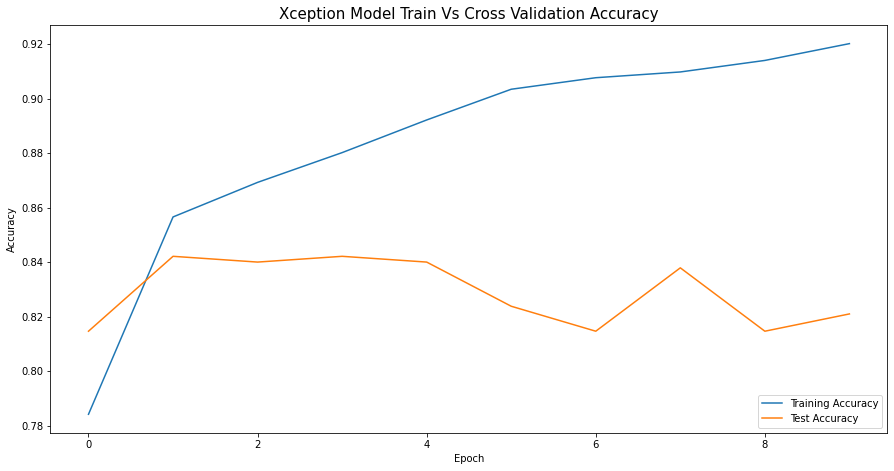

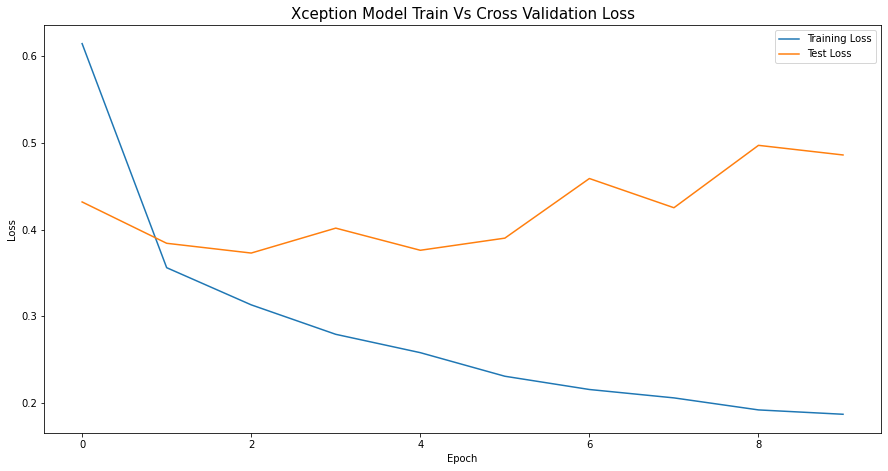

In [59]:
N = 10
plt.figure(figsize = (15, 7.5))
plt.plot(np.arange(0, N), fitted_model.history['accuracy'], label = "Training Accuracy")
plt.plot(np.arange(0, N), fitted_model.history['val_accuracy'], label = "Test Accuracy")
plt.title('Xception Model Train Vs Cross Validation Accuracy', fontsize = 15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc = 'lower right')
plt.savefig("Plots/Xception_Accuracy_plot.jpg")
plt.show()

plt.figure(figsize = (15, 7.5))
plt.plot(np.arange(0, N), fitted_model.history['loss'], label = "Training Loss")
plt.plot(np.arange(0, N), fitted_model.history['val_loss'], label = "Test Loss")
plt.title('Xception Model Train Vs Cross Validation Loss', fontsize = 15)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc = 'upper right')
plt.savefig("Plots/Xception_Loss_plot.jpg")
plt.show()


In [ ]:
headmodel = InceptionV3(weights = "imagenet", include_top = False,
             input_tensor = Input(shape = (299, 299, 3)))
model = headmodel.output
model = AveragePooling2D(pool_size= (5, 5))(model)
model = Flatten(name = 'flatten')(model)
model = Dense(512, activation = 'relu')(model)
model = Dense(256, activation = 'relu')(model)
model = Dropout(0.1)(model)
model = Dense(len(lb.classes_), activation = 'softmax')(model)

final_model = Model(inputs = headmodel.input, outputs = model)

for layer in headmodel.layers:
    layer.trainable = False

In [ ]:
opt = Adam(lr = 1e-3)
final_model.compile(loss = "categorical_crossentropy", optimizer = opt,
                   metrics = ["accuracy"])

In [ ]:
final_model.summary()

In [ ]:
checkpoint = ModelCheckpoint(MODEL_SAVE_PATH + "InceptionV3_weights.h5", monitor = 'val_loss', verbose = 0, 
                            save_best_only = True, save_weights_only = False,
                            mode = 'auto', save_freq = 'epoch')

In [ ]:
fitted_model = final_model.fit(X_train, y_train, validation_data = (X_cv, y_cv), 
               epochs = 10, batch_size = 64, callbacks = checkpoint)

In [ ]:
N = 10
plt.figure(figsize = (15, 7.5))
plt.plot(np.arange(0, N), fitted_model.history['accuracy'], label = "Training Accuracy")
plt.plot(np.arange(0, N), fitted_model.history['val_accuracy'], label = "Test Accuracy")
plt.title('InceptionV3 Model Train Vs Cross Validation Accuracy', fontsize = 15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc = 'lower right')
plt.savefig("Plots/InceptionV3_Accuracy_plot.jpg")
plt.show()

plt.figure(figsize = (15, 7.5))
plt.plot(np.arange(0, N), fitted_model.history['loss'], label = "Training Loss")
plt.plot(np.arange(0, N), fitted_model.history['val_loss'], label = "Test Loss")
plt.title('InceptionV3 Model Train Vs Cross Validation Loss', fontsize = 15)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc = 'upper right')
plt.savefig("Plots/InceptionV3_Loss_plot.jpg")
plt.show()
